In [1]:
from transformers import AutoTokenizer, AutoModel

base_model = AutoModel.from_pretrained('microsoft/deberta-v3-xsmall')
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-xsmall')

/home/maengmaengeeee/anaconda3/envs/edison/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maengmaengeeee/anaconda3/envs/edison/lib/python3.12/site-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [1]:
import torch

disc_state_dict = torch.load('weights/disc_xsmall.bin')
gen_state_dict = torch.load('weights/gen_xsmall.bin')

In [4]:
for key, value in disc_state_dict.items():
    print(f"{key}: {value.shape}")

deberta.embeddings.word_embeddings._weight: torch.Size([128100, 384])
deberta.embeddings.word_embeddings.weight: torch.Size([128100, 384])
deberta.embeddings.position_embeddings._weight: torch.Size([512, 384])
deberta.embeddings.position_embeddings.weight: torch.Size([512, 384])
deberta.embeddings.LayerNorm.weight: torch.Size([384])
deberta.embeddings.LayerNorm.bias: torch.Size([384])
deberta.encoder.layer.0.attention.self.query_proj.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.self.query_proj.bias: torch.Size([384])
deberta.encoder.layer.0.attention.self.key_proj.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.self.key_proj.bias: torch.Size([384])
deberta.encoder.layer.0.attention.self.value_proj.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.self.value_proj.bias: torch.Size([384])
deberta.encoder.layer.0.attention.output.dense.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.output.dense.bias: torch.Size([384])
de

In [3]:
for key, value in gen_state_dict.items():
    print(f"{key}: {value.shape}")

deberta.embeddings.word_embeddings.weight: torch.Size([128100, 384])
deberta.embeddings.position_embeddings.weight: torch.Size([512, 384])
deberta.embeddings.LayerNorm.weight: torch.Size([384])
deberta.embeddings.LayerNorm.bias: torch.Size([384])
deberta.encoder.layer.0.attention.self.query_proj.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.self.query_proj.bias: torch.Size([384])
deberta.encoder.layer.0.attention.self.key_proj.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.self.key_proj.bias: torch.Size([384])
deberta.encoder.layer.0.attention.self.value_proj.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.self.value_proj.bias: torch.Size([384])
deberta.encoder.layer.0.attention.output.dense.weight: torch.Size([384, 384])
deberta.encoder.layer.0.attention.output.dense.bias: torch.Size([384])
deberta.encoder.layer.0.attention.output.LayerNorm.weight: torch.Size([384])
deberta.encoder.layer.0.attention.output.LayerNorm.bias: torch.Siz

In [2]:
for key, value in base_model.named_parameters():
    print(f"{key}: {value.size()}")

embeddings.word_embeddings.weight: torch.Size([128100, 384])
embeddings.LayerNorm.weight: torch.Size([384])
embeddings.LayerNorm.bias: torch.Size([384])
encoder.layer.0.attention.self.query_proj.weight: torch.Size([384, 384])
encoder.layer.0.attention.self.query_proj.bias: torch.Size([384])
encoder.layer.0.attention.self.key_proj.weight: torch.Size([384, 384])
encoder.layer.0.attention.self.key_proj.bias: torch.Size([384])
encoder.layer.0.attention.self.value_proj.weight: torch.Size([384, 384])
encoder.layer.0.attention.self.value_proj.bias: torch.Size([384])
encoder.layer.0.attention.output.dense.weight: torch.Size([384, 384])
encoder.layer.0.attention.output.dense.bias: torch.Size([384])
encoder.layer.0.attention.output.LayerNorm.weight: torch.Size([384])
encoder.layer.0.attention.output.LayerNorm.bias: torch.Size([384])
encoder.layer.0.intermediate.dense.weight: torch.Size([1536, 384])
encoder.layer.0.intermediate.dense.bias: torch.Size([1536])
encoder.layer.0.output.dense.weight: t

In [4]:
import torch
from edison.first.module import LM
from edison.config.config import Config
from transformers import AutoTokenizer

config = Config(
    hidden_dim=384,
    embedding_dim=384,
    max_seq_len=512,
    padding_idx=0,
    vocab_size=128001,
    absolute_position_biased_input=True,
    num_heads=6,
    num_head_dim=64,
    layernorm_eps=1e-7,
    hidden_dropout_prob=0.1,
    num_hidden_layers=12,
    device='cuda',
    mask_lm_prob=0.15,
)
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-base')
model = LM(config)

/home/maengmaengeeee/anaconda3/envs/edison/lib/python3.12/site-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [2]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
LM                                                           --
├─Generator: 1-1                                             --
│    └─InputEmbedding: 2-1                                   --
│    │    └─Embedding: 3-1                                   49,152,384
│    │    └─Embedding: 3-2                                   196,608
│    │    └─LayerNorm: 3-3                                   768
│    └─RelativePositionEmbedding: 2-2                        --
│    │    └─Embedding: 3-4                                   196,608
│    │    └─LayerNorm: 3-5                                   768
│    └─BaseNetworkForLM: 2-3                                 --
│    │    └─ModuleList: 3-6                                  10,646,784
│    └─EnhancedMaskDecoder: 2-4                              --
│    └─MaskedLanguageModelHead: 2-5                          128,001
│    │    └─Linear: 3-7                                      147,8

In [19]:
layer_map = {
    'deberta.embeddings.word_embeddings.weight': 'discriminator.embedding.word_embedding_layer.weight',
    'deberta.embeddings.word_embeddings._weight': 'discriminator.embedding.word_embedding_layer._weight',
    'deberta.embeddings.position_embeddings.weight': 'discriminator.embedding.absolute_position_embedding_layer.weight',
    'deberta.embeddings.position_embeddings._weight': 'discriminator.embedding.absolute_position_embedding_layer._weight',
    'deberta.embeddings.LayerNorm.weight': 'discriminator.embedding.layernorm.weight',
    'deberta.embeddings.LayerNorm.bias': 'discriminator.embedding.layernorm.bias',

    'attention.self.query_proj.weight': 'attention.query_layer.weight',
    'attention.self.query_proj.bias': 'attention.query_layer.bias',
    'attention.self.key_proj.weight': 'attention.key_layer.weight',
    'attention.self.key_proj.bias': 'attention.key_layer.bias',
    'attention.self.value_proj.weight': 'attention.value_layer.weight',
    'attention.self.value_proj.bias': 'attention.value_layer.bias',
    'attention.output.dense.weight': 'attention.feedforward.weight',
    'attention.output.dense.bias': 'attention.feedforward.bias',
    'attention.output.LayerNorm.weight': 'attention.feedforward.layernorm.weight',
    'attention.output.LayerNorm.bias': 'attention.feedforward.layernorm.bias',
    'intermediate.dense.weight': 'feedforward.feedforward_1.weight',
    'intermediate.dense.bias': 'feedforward.feedforward_1.bias',
    'output.dense.weight': 'feedforward.feedforward_2.weight',
    'output.dense.bias': 'feedforward.feedforward_2.bias',
    'output.LayerNorm.weight': 'feedforward.layernorm.weight',
    'output.LayerNorm.bias': 'feedforward.layernorm.bias',
    
    'deberta.encoder.rel_embeddings.weight': 'discriminator.relative_position_embedding.relative_position_embedding_layer.weight',
    'deberta.encoder.LayerNorm.weight': 'discriminator.relative_position_embedding.layernorm.weight',
    'deberta.encoder.LayerNorm.bias': 'discriminator.relative_position_embedding.layernorm.bias',
    'mask_predictions.dense.weight': 'discriminator.head.dense.weight',
    'mask_predictions.dense.bias': 'discriminator.head.dense.bias',
    'mask_predictions.LayerNorm.weight': 'discriminator.head.layernorm.weight',
    'mask_predictions.LayerNorm.bias': 'discriminator.head.layernorm.bias',
    'mask_predictions.classifier.weight': 'discriminator.head.classifier.weight',
    'mask_predictions.classifier.bias': 'discriminator.head.classifier.bias',
    'lm_predictions.lm_head.bias': 'generator.head.bias',
    'lm_predictions.lm_head.dense.weight': 'generator.head.dense.weight',
    'lm_predictions.lm_head.dense.bias': 'generator.head.dense.bias',
    'lm_predictions.lm_head.LayerNorm.weight': 'generator.head.layernorm.weight',
    'lm_predictions.lm_head.LayerNorm.bias': 'generator.head.layernorm.bias',
}
weight_path = 'weights/disc_xsmall.bin'
base_state_dict = torch.load(weight_path)
disc_state_dict = {}
idx = None
for k, v in base_state_dict.items():
    if k.startswith('deberta.encoder.layer'):
        prefix = 'discriminator.encoder.layers'
        idx = int(k.split('.')[3])
        k = '.'.join(k.split('.')[4:])
    if k in layer_map:
        k = layer_map[k]
    try:
        key = f'{prefix}.{idx}.{k}' if idx is not None else k
        disc_state_dict[key] = v
        idx = None
    except KeyError:
        print(f'KeyError: {k}')
# model.load_state_dict(state_dict)

In [20]:
for key, value in disc_state_dict.items():
    print(f"{key}: {value.shape}")

discriminator.embedding.word_embedding_layer._weight: torch.Size([128100, 384])
discriminator.embedding.word_embedding_layer.weight: torch.Size([128100, 384])
discriminator.embedding.absolute_position_embedding_layer._weight: torch.Size([512, 384])
discriminator.embedding.absolute_position_embedding_layer.weight: torch.Size([512, 384])
discriminator.embedding.layernorm.weight: torch.Size([384])
discriminator.embedding.layernorm.bias: torch.Size([384])
discriminator.encoder.layers.0.attention.query_layer.weight: torch.Size([384, 384])
discriminator.encoder.layers.0.attention.query_layer.bias: torch.Size([384])
discriminator.encoder.layers.0.attention.key_layer.weight: torch.Size([384, 384])
discriminator.encoder.layers.0.attention.key_layer.bias: torch.Size([384])
discriminator.encoder.layers.0.attention.value_layer.weight: torch.Size([384, 384])
discriminator.encoder.layers.0.attention.value_layer.bias: torch.Size([384])
discriminator.encoder.layers.0.attention.feedforward.weight: torc

In [1]:
weight_path = 'weights/gen_xsmall.bin'
base_state_dict = torch.load(weight_path)  # gen
gen_state_dict = {}
idx = None
for k, v in base_state_dict.items():
    if k.startswith('deberta.encoder.layer'):
        prefix = 'generator.encoder.layers'
        idx = int(k.split('.')[3])
        k = '.'.join(k.split('.')[4:])
    if k in layer_map:
        k = layer_map[k]
    try:
        key = f'{prefix}.{idx}.{k}' if idx is not None else k
        gen_state_dict[key] = v
        idx = None
    except KeyError:
        print(f'KeyError: {k}')

NameError: name 'torch' is not defined

In [24]:
for key, value in gen_state_dict.items():
    print(f"{key}: {value.shape}")

discriminator.embedding.word_embedding_layer.weight: torch.Size([128100, 384])
discriminator.embedding.absolute_position_embedding_layer.weight: torch.Size([512, 384])
discriminator.embedding.layernorm.weight: torch.Size([384])
discriminator.embedding.layernorm.bias: torch.Size([384])
generator.encoder.layers.0.attention.query_layer.weight: torch.Size([384, 384])
generator.encoder.layers.0.attention.query_layer.bias: torch.Size([384])
generator.encoder.layers.0.attention.key_layer.weight: torch.Size([384, 384])
generator.encoder.layers.0.attention.key_layer.bias: torch.Size([384])
generator.encoder.layers.0.attention.value_layer.weight: torch.Size([384, 384])
generator.encoder.layers.0.attention.value_layer.bias: torch.Size([384])
generator.encoder.layers.0.attention.feedforward.weight: torch.Size([384, 384])
generator.encoder.layers.0.attention.feedforward.bias: torch.Size([384])
generator.encoder.layers.0.attention.feedforward.layernorm.weight: torch.Size([384])
generator.encoder.lay

In [1]:
from edison.first.load_state import load_pretrained_LM

model, disc, gen = load_pretrained_LM(
    ['weights/disc_xsmall.bin', 'weights/gen_xsmall.bin'],)

/home/maengmaengeeee/anaconda3/envs/edison/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


not included: deberta.embeddings.word_embeddings.weight
not included: deberta.embeddings.position_embeddings.weight
not included: lm_predictions.lm_head.bias
not included: lm_predictions.lm_head.dense.weight
not included: lm_predictions.lm_head.dense.bias
not included: lm_predictions.lm_head.LayerNorm.weight
not included: lm_predictions.lm_head.LayerNorm.bias


In [2]:
for key, value in model.discriminator.named_parameters():
    print(f"{key}: {value.size()}")

embedding.word_embedding_layer._weight: torch.Size([128100, 384])
embedding.absolute_position_embedding_layer._weight: torch.Size([512, 384])
embedding.layernorm.weight: torch.Size([384])
embedding.layernorm.bias: torch.Size([384])
relative_position_embedding.relative_position_embedding_layer.weight: torch.Size([512, 384])
relative_position_embedding.layernorm.weight: torch.Size([384])
relative_position_embedding.layernorm.bias: torch.Size([384])
encoder.layers.0.attention.query_layer.weight: torch.Size([384, 384])
encoder.layers.0.attention.query_layer.bias: torch.Size([384])
encoder.layers.0.attention.key_layer.weight: torch.Size([384, 384])
encoder.layers.0.attention.key_layer.bias: torch.Size([384])
encoder.layers.0.attention.value_layer.weight: torch.Size([384, 384])
encoder.layers.0.attention.value_layer.bias: torch.Size([384])
encoder.layers.0.attention.feedforward.dense.weight: torch.Size([384, 384])
encoder.layers.0.attention.feedforward.dense.bias: torch.Size([384])
encoder.l

In [4]:
import pandas as pd

df = pd.read_csv('lightning_logs/version_91/metrics.csv')

In [5]:
df.set_index('step', inplace=True)
df

,epoch,loss_disc,loss_gen
step,,,
49,0,15.887872,10.360911
99,0,16.492992,10.419763
149,0,11.897016,8.268582
199,0,14.725536,9.164614
249,0,14.213744,8.794498
...,...,...,...
183799,0,6.835743,4.313547
183849,0,13.380176,4.591283
183899,0,4.943836,2.098058


<Axes: title={'center': 'Loss'}, xlabel='step'>

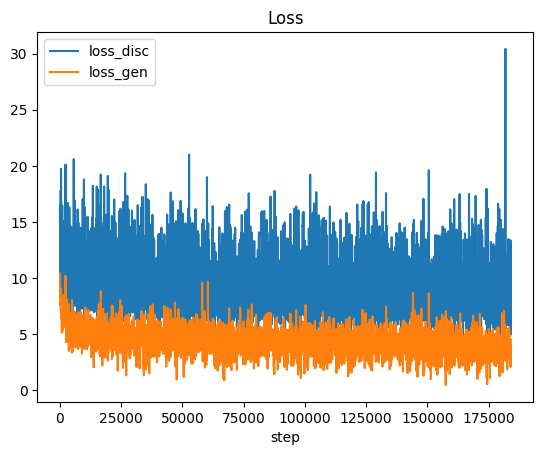

In [9]:
df.plot(y=['loss_disc', 'loss_gen'], title='Loss')

In [5]:
from edison.first.datamodule import LMDataModule

dm = LMDataModule(config=config, tokenizer=tokenizer)

In [7]:
dm.dataset_names=['wikipedia']
dm.prepare_data()
dm.setup()
dataset = dm.train_dataloader()

In [11]:
dataset = dm.train_dataset
dataset

Dataset({
    features: ['text'],
    num_rows: 28795678
})

In [35]:
tokens = tokenizer(dataset[11000]['text'][:512], truncation=True, max_length=128)
len(tokens['input_ids'])

105